In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('aggregated covid19 data.csv')
df.head()

,Unnamed: 0,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active
0,0,2020-01-22,Afghanistan,33.93911,67.709953,0,0,0,0
1,1,2020-01-22,Albania,41.15330,20.168300,0,0,0,0
2,2,2020-01-22,Algeria,28.03390,1.659600,0,0,0,0
3,3,2020-01-22,Andorra,42.50630,1.521800,0,0,0,0
4,4,2020-01-22,Angola,-11.20270,17.873900,0,0,0,0


In [7]:
df.shape

(35156, 9)

In [9]:
df.size

316404

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      35156 non-null  int64  
 1   Date            35156 non-null  object 
 2   Country/Region  35156 non-null  object 
 3   Lat             35156 non-null  float64
 4   Long            35156 non-null  float64
 5   Confirmed       35156 non-null  int64  
 6   Deaths          35156 non-null  int64  
 7   Recovered       35156 non-null  int64  
 8   Active          35156 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


In [15]:
# Group by Date and compute daily totals
dtdf = df.groupby("Date").agg({
    "Confirmed": "sum",
    "Active": "sum",
    "Recovered": "sum",
    "Deaths": "sum"
}).reset_index()

# Sort by date for chronological order
dtdf = dtdf.sort_values(by="Date").reset_index(drop=True)

# Preview the aggregated daily totals
dtdf.head()

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,555,510,28,17
1,2020-01-23,654,606,30,18
2,2020-01-24,941,879,36,26
3,2020-01-25,1434,1353,39,42
4,2020-01-26,2118,2010,52,56


In [17]:
dtdf.index

RangeIndex(start=0, stop=188, step=1)

In [19]:
df.columns

Index(['Unnamed: 0', 'Date', 'Country/Region', 'Lat', 'Long', 'Confirmed',
       'Deaths', 'Recovered', 'Active'],
      dtype='object')

In [21]:
dtdf.set_index('Date', inplace=True)
dtdf.head()

,Confirmed,Active,Recovered,Deaths
Date,,,,
2020-01-22,555,510,28,17
2020-01-23,654,606,30,18
2020-01-24,941,879,36,26
2020-01-25,1434,1353,39,42
2020-01-26,2118,2010,52,56


In [23]:
dtdf.isnull().sum()

Confirmed    0
Active       0
Recovered    0
Deaths       0
dtype: int64

In [25]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

# Example usage for each variable
variables = ['Confirmed', 'Active', 'Recovered', 'Deaths']
for var in variables:
    print(f"\nStationarity Check for {var}:")
    check_stationarity(df[var])



Stationarity Check for Confirmed:
ADF Statistic: -12.5774092245716
p-value: 1.943692446942312e-23
Critical Values:
   1%: -3.430536291930778
   5%: -2.861622336437604
   10%: -2.566813825096627
The series is stationary.

Stationarity Check for Active:
ADF Statistic: -17.792113766274383
p-value: 3.244011063333879e-30
Critical Values:
   1%: -3.4305363025455717
   5%: -2.861622341128934
   10%: -2.5668138275937
The series is stationary.

Stationarity Check for Recovered:
ADF Statistic: -10.365240016772647
p-value: 2.339625146584055e-18
Critical Values:
   1%: -3.4305363025455717
   5%: -2.861622341128934
   10%: -2.5668138275937
The series is stationary.

Stationarity Check for Deaths:
ADF Statistic: -16.6715895422123
p-value: 1.5432677717832978e-29
Critical Values:
   1%: -3.4305363025455717
   5%: -2.861622341128934
   10%: -2.5668138275937
The series is stationary.


In [27]:
from statsmodels.tsa.api import VAR

# Instantiate the VAR model with the aggregated data
model = VAR(dtdf)

# Select the optimal lag order
lag_order_results = model.select_order(maxlags=15)

# Display the results
print("Selected Lag Order by AIC:", lag_order_results.aic)
print("Selected Lag Order by BIC:", lag_order_results.bic)
print("\nFull Summary:")
print(lag_order_results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


LinAlgError: 4-th leading minor of the array is not positive definite

In [29]:
np.isinf(dtdf).sum()

Confirmed    0
Active       0
Recovered    0
Deaths       0
dtype: int64

In [39]:
from statsmodels.tsa.api import VAR

# Instantiate the VAR model with the aggregated data
model = VAR(dtdf)

# Select the optimal lag order
lag_order_results = model.select_order(maxlags=2)

# Display the results
print("Selected Lag Order by AIC:", lag_order_results.aic)
print("Selected Lag Order by BIC:", lag_order_results.bic)
print("\nFull Summary:")
print(lag_order_results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


LinAlgError: 4-th leading minor of the array is not positive definite

In [33]:
correlation_matrix = dtdf.corr()
correlation_matrix

,Confirmed,Active,Recovered,Deaths
Confirmed,1.000000,0.986543,0.990165,0.975981
Active,0.986543,1.000000,0.953981,0.996879
Recovered,0.990165,0.953981,1.000000,0.936940
Deaths,0.975981,0.996879,0.936940,1.000000


In [47]:
dtdf = dtdf.drop(columns=['Active'])
dtdf.head()

KeyError: "['Active'] not found in axis"

In [49]:
dtdf

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-07-23,15510481,8710969,633506
2020-07-24,15791645,8939705,639650
2020-07-25,16047190,9158743,644517


In [51]:
from statsmodels.tsa.api import VAR

# Instantiate the VAR model with the aggregated data
model = VAR(dtdf)

# Select the optimal lag order
lag_order_results = model.select_order(maxlags=15)

# Display the results
print("Selected Lag Order by AIC:", lag_order_results.aic)
print("Selected Lag Order by BIC:", lag_order_results.bic)
print("\nFull Summary:")
print(lag_order_results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Lag Order by AIC: 15
Selected Lag Order by BIC: 3

Full Summary:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        75.27       75.32   4.892e+32       75.29
1        52.49       52.71   6.262e+22       52.58
2        51.68       52.07   2.796e+22       51.84
3        51.50      52.05*   2.329e+22       51.72
4        51.53       52.24   2.396e+22       51.82
5        51.48       52.35   2.271e+22       51.83
6        51.26       52.30   1.831e+22       51.68
7        51.00       52.20   1.416e+22       51.49
8        50.70       52.06   1.046e+22      51.25*
9        50.73       52.26   1.089e+22       51.35
10       50.71       52.41   1.067e+22       51.40
11       50.60       52.46   9.641e+21       51.36
12       50.64       52.67   1.007e+22       51.46
13       50.62       52.81   9.905e+21       51.51
14       50.53       52.88   9.089e+21       51.48
15      

In [55]:
# Determine the split index
train_size = int(0.8 * len(dtdf))
train_data = dtdf[:train_size]  # First 80% for training
test_data = dtdf[train_size:]  # Remaining 20% for testing

In [57]:
from statsmodels.tsa.api import VAR

# Create and fit the VAR model using training data
model = VAR(train_data)
lag_order = 3
var_model = model.fit(lag_order)

print(var_model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Nov, 2024
Time:                     22:15:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    49.6419
Nobs:                     147.000    HQIC:                   49.2796
Log likelihood:          -4199.57    FPE:                1.96983e+21
AIC:                      49.0316    Det(Omega_mle):     1.61689e+21
--------------------------------------------------------------------
Results for equation Confirmed
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const             1556.517365      1129.318510            1.378           0.168
L1.Confirmed         1.571880         0.103985           15.116           0.000
L1.Recovered         0.020975         0.069908            0.

In [59]:
# Forecast for the number of steps in the test dataset
forecast = var_model.forecast(y=train_data.values[-lag_order:], steps=len(test_data))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

In [63]:
forecast_df.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-06-20,8.824691e+06,4.283273e+06,466577.401121
2020-06-21,9.000161e+06,4.380217e+06,470897.760503
2020-06-22,9.172993e+06,4.481566e+06,475359.393004
2020-06-23,9.349386e+06,4.590701e+06,480664.100851
2020-06-24,9.532831e+06,4.703360e+06,486874.477865


In [65]:
forecast_df.isnull().sum()

Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a dictionary to store the results
metrics = {}

# Loop through each column in the dataset
for column in test_data.columns:
    actual = test_data[column]
    predicted = forecast_df[column]
    
    # Compute evaluation metrics
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    # Store the results
    metrics[column] = {'MAE': mae, 'MSE': mse, 'R²': r2}

# Display the metrics
metrics_df = pd.DataFrame(metrics).T
metrics_df


,MAE,MSE,R²
Confirmed,1.255458e+06,2.934251e+12,0.445340
Recovered,2.283173e+05,1.173227e+11,0.951134
Deaths,9.215411e+04,1.608147e+10,-4.201950


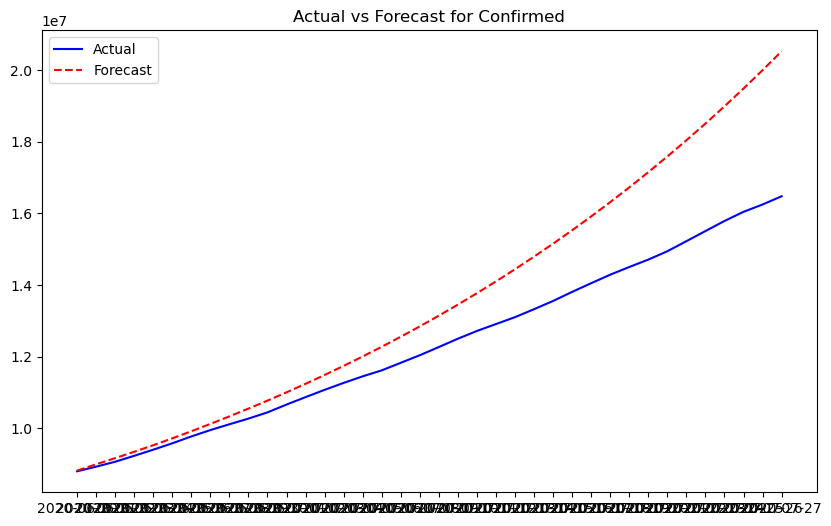

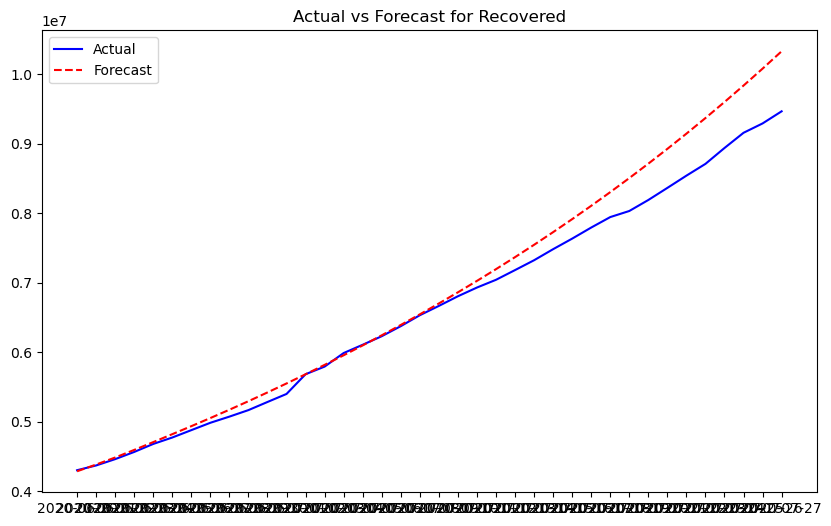

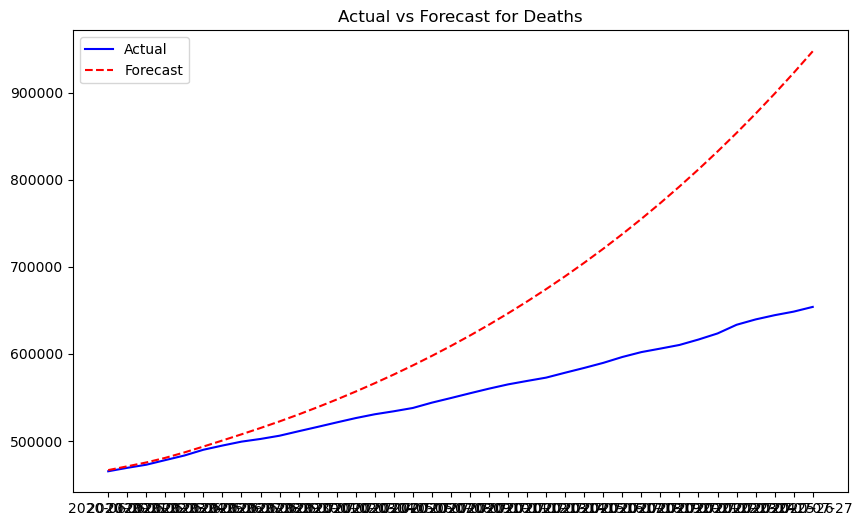

In [69]:
# Plot actual vs forecast for each column
for column in test_data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[column], label='Actual', color='blue')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast', color='red', linestyle='--')
    plt.title(f'Actual vs Forecast for {column}')
    plt.legend()
    plt.show()